## 학습목표

## Bag Of Words
    :단어의 순서를 고려하지 않고, 단어의 등장 빈도(frequency)만을 고려해서 단어를 벡터화하는 방법입니다.
    주로 불필요한 단어를 제거하거나 표현은 다르지만 같은 단어를 통합시켜주는 정규화와 같은 전처리를 한다.

## 원-핫 인코딩(one-hot encoding)
    : 모든 단어의 관계를 독립적으로 정의하는 원-핫 인코딩이라는 방식도 있다. 원-핫 인코딩ㅇ을 ㅎ기 위해서는 우선 갖고 있는 텍스트데이터에서 단어들의 집합인 단어장(vocabulary)을 만듭니다. 그 후 단어장에 있는 모든 단어에 대해서 1부터 V까지 고유한 정수를 부여합니다. 이 정수는 단어장에 있는 각 단어의 일종의 인덱스 역할을 한다. 각 단어는 V차원의 벡터로 표현되는데, 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터
   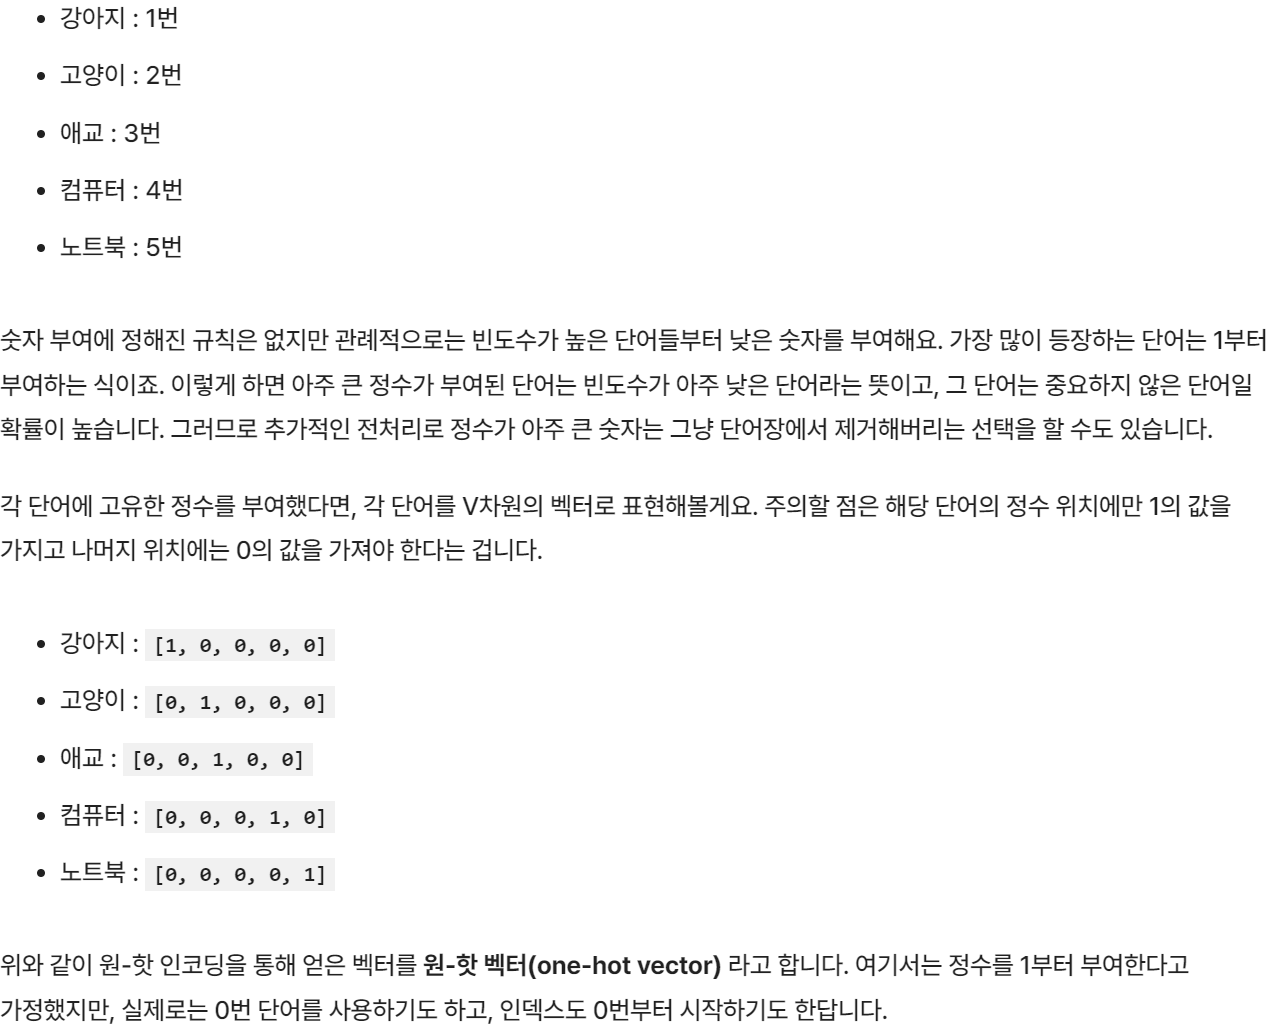

# 원-핫 인코딩 실습

In [2]:
import re
from konlpy.tag import Okt
from collections import Counter

In [3]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

In [4]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


## 토큰화
    - 단어장을 구성하기 위해서는 단어장의 원소인 토큰(TOKEN)이라는 단위를 정해줄 필요가 있습니다. 그리고 한국어는 주로 형태소 분석기를 통해서 토큰 단위를 나눠줍니다.

In [5]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


## 단어장 만들기
    - 위의 토큰을 가지고 단어장을 만듦. 빈도수가 높은 단어일수록 낮은 정수를 부여. 빈도수가 높은 순서대로 낮은 정수를 부여하기 위해서 각 단어의 빈도수를 카운트

In [6]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


In [7]:
## 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab_size = 5
vocab = vocab.most_common(vocab_size)
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


In [8]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


## 원-핫 벡터 만들기

In [9]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index-1] = 1
       return one_hot_vector

In [10]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

## 케라스를 통한 원-핫 인코딩(one-hot encoding)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index)

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [12]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [13]:
vocab_size = len(t.word_index) + 1
#print("슝=3")
print(vocab_size)

6


## 희소벡터
    - DTM, TF-IDF, 원-핫 인코딩은 단어장의 규모에 영향을 받는 희소벡터라는 특징을 가짐

## 차원의 저주
    - 우리가 한 샘플을 특정짓기 위해서 많은 양의 정보를 준비할수록(고차원 데이터일수록) 그 데이터로부터 모델을 학습하기가 훨씬 어려워지고 훨씬 더 많은 데이터 양이 필요하게 된다.
    결론: 데이터의 용량이 커지면 성공적 모델의 학습을 저해할 수 도 있다.

## 원핫벡터의 단점
    - 두 단어의 의미적 유사성을 반영하지 못한다.
    - 벡터 간 유사도를 구하는 방법중 하나는 내적이다. 임의의 두개의 원-핫 벡터 간 내적을 구해보면, 대부분 서로 직교하여 그 값은 0이다. 결국은 원핫벡터를 통해서는 단어 벡터 간 유사도를 구할 수 없다.

# 워드 임베딩(Word Embedding)
    - 한 단어를 벡터로 치환.하지만 벡터의 길이를 모두 일정하게 유지. 더 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않는다. 일반적으로 벡터의 길이가 단어장 크기보다 매우 작기 때문에 각 벡터 값에 정보가 축약

## 분포 가설(Distributional Hypothesis)
    - 분포 가설에 따르는 Word2Vec은 같이 등장하는 경향이 적은 단어들에 비해 '애교','귀여운','강아지'같은 단어들을 상대적으로 유사도가 높은 벡터

## CBoW(Continuous Bag of Words)
    - 예문: "I like sweet snacks.". CBoW는 중간에 있는 단어를 예측하는 방법으로
    {"i", "like", "sweet", "snacks"}으로부터 "sweet"을 예측하는 것은 CBoW가 하는 일.
    예측해야 하는 단어 "sweet"을 중심단어(center word)라고 하고, 예측에 사용되는 단어들을 주변단어(context word)라고 한다.
    - window: 중심 단어를 예측을 위해서, 앞, 뒤로 몇개의 단어를 볼지 결정
    예를들어 윈도우 크기가 1이면 예측하고자 하는 중심단어가 "sweet"이면 앞의 한 단어인 "like와 뒤의 한 단어인 "snacks"을 참고한다. 

## Skip-gram
    - 주변 단어로 중심 단어를 예측하는 것이 아니고, 중심 단어로부터 주변 단어를 예측

In [14]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk.corpus import abc
corpus = abc.sents()
print(corpus)

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]


In [16]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [17]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [18]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# vector_size = 학습후 임베딩 벡터의 차원
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도수 제한(빈도가 적은 단어들은 학습X)
# workers = 학습을 위한 프로세스

In [19]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233373999595642), ('skull', 0.911032497882843), ('Bang', 0.9056490063667297), ('asteroid', 0.9051957130432129), ('third', 0.9020178318023682), ('baby', 0.8993921279907227), ('dog', 0.8985978364944458), ('bought', 0.8975234031677246), ('rally', 0.8912491798400879), ('disc', 0.8888981342315674)]


In [20]:
## 모델 저장 및 로드
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('~/aiffel/word_embedding/w2v') 
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/word_embedding/w2v")

In [21]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9233373999595642), ('skull', 0.911032497882843), ('Bang', 0.9056490063667297), ('asteroid', 0.9051957130432129), ('third', 0.9020178318023682), ('baby', 0.8993921279907227), ('dog', 0.8985978364944458), ('bought', 0.8975234031677246), ('rally', 0.8912491798400879), ('disc', 0.8888981342315674)]


# Word2Vec의 OOV 문제
    - Word2Vec은 Bag of Words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out of Vocabulary)
    사전에 없는 단어에 대해서는 Word2Vec은 임베딩 벡터값을 얻지 못한다.

## 임베딩 벡터의 시각화
    - 구글이 공개한 임베딩 벡터의 시각화 오픈소스인 임베딩 프로젝트를 사용해서 임베딩 벡터들을 시각화

# FastText
    - Word2Vec을 그대로 따르고 있지만 문자 단위 n-gram(character-level n-gram)표현을 학습
    FastText는 단어 내부의 내부 단어(subwords)들을 학습

In [22]:
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)
print(fasttext_model)

FastText(vocab=10363, vector_size=100, alpha=0.025)


In [23]:
fasttext_model.wv.most_similar('overacting')

[('resolving', 0.9386292099952698),
 ('fluctuating', 0.9377527236938477),
 ('emptying', 0.93631511926651),
 ('malting', 0.9345669150352478),
 ('extracting', 0.9307610392570496),
 ('mounting', 0.9306672811508179),
 ('shooting', 0.9288994669914246),
 ('overwhelming', 0.9285604357719421),
 ('debilitating', 0.9269091486930847),
 ('lifting', 0.926354169845581)]

In [24]:
fasttext_model.wv.most_similar('memoryy')

[('memory', 0.9452936053276062),
 ('mechanisms', 0.8631874918937683),
 ('musical', 0.8606794476509094),
 ('mechanism', 0.8597366809844971),
 ('basic', 0.8585033416748047),
 ('imagine', 0.8582749366760254),
 ('mechanical', 0.8495903015136719),
 ('intelligence', 0.8452058434486389),
 ('intercourse', 0.8424773216247559),
 ('technical', 0.8424162864685059)]